In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def output_results(out):
    pd.DataFrame({'deaths': out, 'Id': range(11)}).to_csv('mewmew_preds.csv', index=False)

training_df = pd.read_csv('phase1_training_data.csv')
training_df['date'] = training_df['date'].astype('datetime64')
training_df['country_id'].fillna('Unknown', inplace=True)

for col in training_df.columns[2:]:
    training_df[col+'_daily'] = training_df.groupby('country_id')[col].transform(lambda x: x.diff().fillna(0))
    
ca_train_df = training_df[(training_df['country_id'] == 'CA') & (training_df['date'] >= '2020-02-13')]
# ca_train_df = training_df[training_df['country_id'] == 'CA'][150:]

second_val_df = pd.read_csv('general_phase_1_answer.csv')
ca_val_df = second_val_df[second_val_df['country_id'] == 'CA']

In [6]:
from AutoReg_MultiVar import AutoRegressionModelMultiVar as armv

data = ca_train_df['deaths_daily'].values
cases = ca_train_df['cases_daily'].values

model = armv(k=11, bias=True)
model.fit(data, [cases], [[18]])
pred = np.cumsum(model.predict(len(data), len(data)+10)) + ca_train_df['deaths'].values[-2]
# pred = model.predict(len(data), len(data)+10)
np.sqrt(np.mean((ca_val_df['deaths'][:11] - pred) ** 2))
# pd.DataFrame(errs, columns=['lag', 'mse']).plot.line(x='lag', y='mse', grid=True, figsize=(15, 7))

283.37911990536253

In [5]:
pd.DataFrame(model.Z, columns=np.concatenate([['bias'], ['death_{}'.format(i) for i in range(11)], ['case_17']]))

,bias,death_0,death_1,death_2,death_3,death_4,death_5,death_6,death_7,death_8,death_9,death_10,case_17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1.0,6.0,6.0,11.0,6.0,9.0,6.0,6.0,7.0,6.0,10.0,13.0,515.0
214,1.0,6.0,11.0,6.0,9.0,6.0,6.0,7.0,6.0,10.0,13.0,6.0,518.0
215,1.0,11.0,6.0,9.0,6.0,6.0,7.0,6.0,10.0,13.0,6.0,22.0,1351.0
216,1.0,6.0,9.0,6.0,6.0,7.0,6.0,10.0,13.0,6.0,22.0,90.0,793.0


In [42]:
output_results(pred)

In [80]:
model = armv(k=2, bias=True)
model.fit(ca_train_df['deaths'].values, np.empty(0), np.empty(0))
# pred = np.cumsum(model.predict(len(data), len(data)+10)) + ca_train_df['deaths'].values[-1]
# pred = model.predict(len(data), len(data)+10)
np.sqrt(np.mean((ca_val_df['deaths'][:11] - pred) ** 2))

11.393656444362648

In [81]:
np.cumsum([1, 2, 3, 4])

array([ 1,  3,  6, 10])

In [51]:
model = armv(k=2, bias=True)
model.fit(ca_train_df['deaths'].values, np.empty(0), np.empty(0))

np.sqrt(np.mean((ca_val_df['deaths'][:11] - model.predict(len(data), len(data)+10)) ** 2))

11.393656444362648

In [ ]:
from statsmodels.

In [32]:
pred

array([9518.96632953, 9534.44274639, 9531.24040019, 9543.29979285,
       9544.05964307, 9537.4985972 , 9541.21039144, 9537.90771397,
       9541.55468138, 9549.60301882, 9553.54474956])

In [34]:
model = armv(k=8, bias=True)
model.fit(data, np.empty(0), np.empty(0))
np.sqrt(np.mean((ca_val_df['deaths'][:11] - model.predict(len(data), len(data)+10)) ** 2))

18.95879426317041

In [67]:
from AutoReg_MultiVar import AutoRegressionModelMultiVar as armv

data = ca_train_df['deaths'].values
cases = ca_train_df['cases'].values

model = armv(k=6, bias=True)
model.fit(data, [cases], [[11, 12, 13, 14, 15]])
np.sqrt(np.mean((ca_val_df['deaths'][:11] - model.predict(len(data), len(data)+10)) ** 2))

22.005556773729

In [36]:
model.predict(len(data), len(data)+10)

[9506.86218204649,
 9523.977714474282,
 9534.104070689107,
 9542.197097068314,
 9551.423021333112,
 9570.334840503674,
 9595.777973182685,
 9626.297313784899,
 9656.315951141964,
 9687.536616356323,
 9719.078600390465]

<AxesSubplot:>

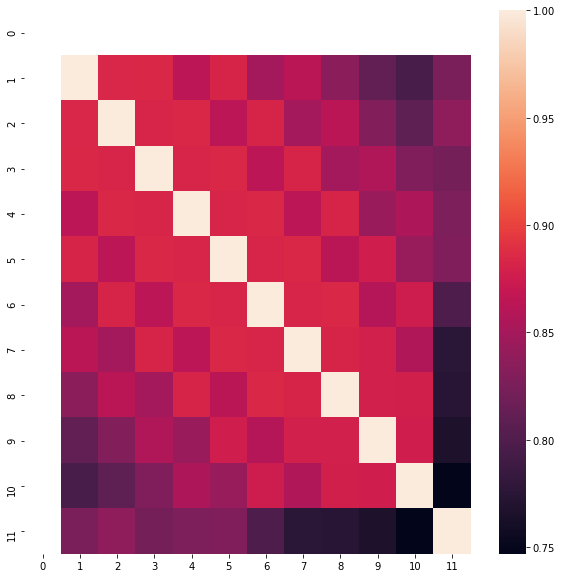

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame(model.Z).corr())

In [ ]:
مرگ هر روز
مرگ ۶ روز قبل
کیس ۱۶ روز قبل
دیتا روزانه
یک مارچ

In [61]:
model = armv(k=1, bias=True)
model.fit(ca_train_df['deaths'], np.empty(0), np.empty(0))

KeyError: 1